In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#outcome = 1 Şeker hastası
#oucome = 0 Sağlıklı

In [25]:
data = pd.read_csv ("diabetes.csv")

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


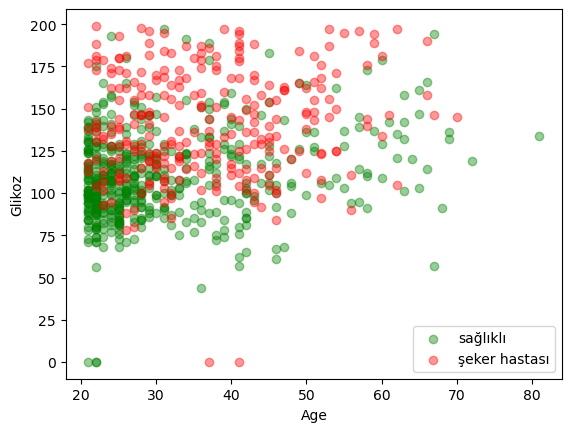

In [28]:
hasta= data[data.Outcome == 1]
saglikli= data [data.Outcome == 0]

#glikoza bakarak bir çizim..
plt.scatter (saglikli.Age, saglikli.Glucose, color="green", label="sağlıklı", alpha=0.4)
plt.scatter (hasta.Age, hasta.Glucose, color="red", label="şeker hastası", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glikoz")
plt.legend()
plt.show()

In [29]:
#x ve y eksenlerini belirleme
y = data.Outcome.values
x_ham_veri = data.drop (["Outcome"],axis=1)
#outcome sütununu çıkarıyoruz (bağımlı değişken) ve geriye sadece bağımsız değişkenler kalıyor..
#KNN algoritması x değerleri içinde gruplandırma yapacak.

In [30]:
#normalizasyon işlemi (x ham verisi içindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelleyeceğiz.)
#-->normalizasyon yapmazsak küçük rakamlar büyük rakamları ezer ve KNN'i yanıltır.
x=(x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

print ("normalizasyon öncesi ham veri: \n")
print (x_ham_veri.head())

print ("normalizasyon sonrası ham veri: \n")
print (x.head())

normalizasyon öncesi ham veri: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
normalizasyon sonrası ham veri: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  

/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [31]:
#train ve test datayı ayırıyoruz
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

#knn modeli oluşturuluyor
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu ",knn.score(x_test,y_test))


K=3 için test verilerimizin doğrulama testi sonucu  0.7857142857142857


In [32]:
#k kaç olmalı? (en iyi k değerinin belirlenmesi)
sayac=1
for k in range (1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " ", "Doğruluk oranı: %",knn_yeni.score(x_train,y_train)*100)
    sayac+=1


1   Doğruluk oranı: % 100.0
2   Doğruluk oranı: % 82.41042345276874
3   Doğruluk oranı: % 83.87622149837134
4   Doğruluk oranı: % 81.92182410423453
5   Doğruluk oranı: % 81.92182410423453
6   Doğruluk oranı: % 79.47882736156352
7   Doğruluk oranı: % 78.99022801302932
8   Doğruluk oranı: % 79.47882736156352
9   Doğruluk oranı: % 78.99022801302932
10   Doğruluk oranı: % 78.33876221498372


In [33]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1